<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descipcion del problema

Nosotros queremos encontrar un elemento X dentro de un arreglo el cual se encuentra en la i-esima posición dentro del arreglo A

Para ello tenemos una entrada de un conjunto de elementos dentro de un arreglo que denominaremos arreglo A.

Como salida queremos que nos entregue un elemento X perteneciente al arreglo A el cual sea exactemente mayor que los elementos i - 1 dentro del arreglo

## 2) Descripción del algoritmo

El algoritmo consta de 2 partes fundamentales, por un lado tenemos el partition que es la parte donde seleciona el pivote con el cual vamos a trabajar, por otro lado tenemos el selection el cual verificará y encontrara el i-esimo valor 

## 2.1) Partition

Dentro de lo que es el partition tenemos 2 caminos a seguir los cuales son el random-partition y el select-partition la diferencia principal es el metodo para seleccionar el pivote que necesitamos para poder trabajar mas adelante

### 2.1.1) Select-Partition


Este partition consta de dentro del arreglo A lo agrupamos arreglos de 5 elementos o mejor dicho agrupamos los x veces grupos de 5 elementos como sea posible. Luego de formar los grupos aplicamos insertion sort para ordenar estos grupos para inmediatamente poder calcular la mediana de dichos arreglos para asi formar un arreglo de medianas. Una vez obtenido el arreglo de medianas tenemos que sacar la mediana del arreglo de medianas para ello podemos ocupar la funcion select dentro del mismo algoritmo y de esta forma obtenemos la mediana de medianas la cual funciona como el mejor pivote calculable.

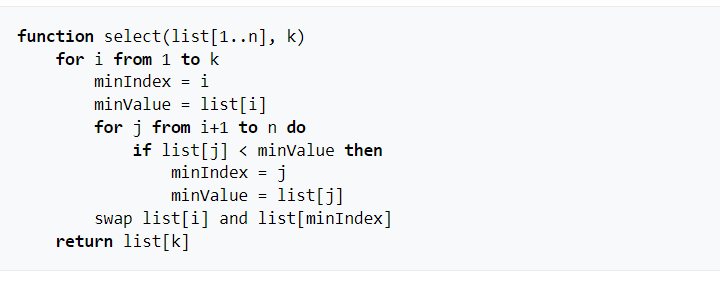 

### 2.1.2) Radom-pertition

Random-partition es bastante mas simple en comparación a lo que es Select-partition esto es debido a que para seleccionar un pivote nosotros aplicamos una función random(x) el cual nos entre un valor random dentro del arreglo, este valor sera nuestro pivote para las siguientes iteraciones y pasos a seguir.

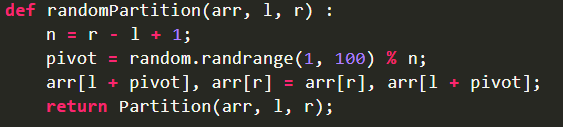

## 2.1.3) Select 


Para lo que es el select tenemos que es una funcion recursiva de forma tal donde tenemos un caso base que verifica si el i-esimo número que estamos buscando es perteneciente al pivote o no, si no es igual al pivote entonces vemos si nuestro i es mayor o menor al pivote dependiendo de ello es cual lado escogeremos para poder trabajar, una vez decidido que lado trabajar llamamos recursivamente a select entregandole el lado a trabajar y esto se va a iterar hasta encontrar la i-esima posicion con el valor deseado retornando dicho valor.

agregar imagenes descriptivas

# 3) Codigo

In [80]:
def insertionSort(a):
  aux = 0;
  n = len(a)
  for i in range(1, len(a)):
    clave = a[i]
    j = i - 1    

    while j >= 0 and clave < a[j]:
       aux = aux + 1
       a[j + 1] = a[j]
       j = j - 1
    a[j + 1] = clave

  return a, aux

In [79]:
def randomPartition(arr, l, r) :
    n = r - l + 1;
    pivot = random.randrange(1, 100) % n;
    arr[l + pivot], arr[r] = arr[r], arr[l + pivot];
    return partition(arr, l, r);

In [89]:
import math 

def pivot_select(arr, low, high):
  contador_grupos = math.ceil((high - low + 1)/5)
  indice_medianas = []
  medianas = []
  global i
  for k in range(contador_grupos):
    rangoLow = low + 5 * k
    rangoHigh = low+4 + 5 * k

    if (rangoHigh > high):
      rangoHigh = high

    arr[rangoLow:rangoHigh + 1] = insertionSort(arr[rangoLow:rangoHigh + 1])
    indice_medianas.append((rangoHigh + rangoLow)//2)
    medianas.append(arr[indice_medianas[k]])

  medianas = insertionSort(medianas)
  medianaDeMedianas = medianas[contador_grupos//2]
  
  for k, value in enumerate(str(contador_grupos)):
    if (medianaDeMedianas == arr[indice_medianas[k]]):
      i = indice_medianas[k]
      break

  (arr[high], arr[i]) = (arr[i], arr[high])
  return partition(arr,low,high)
  

In [3]:
def partition(arr, l, r):
  
  x = arr[r]
  i = l
  for j in range(l, r):
    if arr[j] <= x:
      arr[i], arr[j] = arr[j], arr[i]
      i += 1
              
  arr[i], arr[r] = arr[r], arr[i]
  return i 

In [4]:
def select(arr, l, r, k, verbose = False):


    if (k > 0 and k <= r - l + 1):
  
        index = pivot_select(arr, l,r)
        if verbose == True: print("Pivote:",index)
  
        if (index - l == k - 1):
            return arr[index]
  
        if (index - l > k - 1):
            return select(arr, l, index - 1, k)
  
        return select(arr, index + 1, r, 
                            k - index + l - 1)
  

In [90]:
arr = [ 10, 4, 5, 8, 6, 11, 26 ]
n = max(arr)
i = 3
print("I-ESIMO ELEMENTO MÁS PEQUEÑO:")
print(select(arr, 0, n - 1, i, False))

I-ESIMO ELEMENTO MÁS PEQUEÑO:


TypeError: ignored

## 3.1) Ejecucion paso a paso

In [86]:
arr = [ 10, 4, 5, 8, 6, 11, 26 ]
n = max(arr)
k = 3
print("I-ESIMO ELEMENTO MÁS PEQUEÑO:")
print(select(arr, 0, n - 1, k,True))

I-ESIMO ELEMENTO MÁS PEQUEÑO:


IndexError: ignored

# 4) Tiempo de ejecución

Cada elemento perteneciente al arreglo A[ low high ] tiene la misma probabilidad de ser elegido como pivote $->$ A[low, high] tiene tamaño k con probabilidad $\frac {1}{n}$ $($ A[ ] tiene n elemento $)$

-> Xn = I 

-> E[En] = 1/n



-> A[low, q - 1] -> k -1 elementos    
                                  
-> A[q + 1, high] -> n - k elementos   

=> estos elementos tienen un Xn = 1

por lo que 

* Para el peor caso a escoger seria el mas grande entre k - 1 y n - k 
 (rucursividad al mayor subarreglo) 

> ---> T(n) =  $\displaystyle \sum_{k = 1}^{n}X_n $ T(max(k - 1, n - h)) = O(n), E[Xn]  (  O(n) es la partición  )


*  Tiempo de ejecución esperando

 
> ---> E[T(n)] = $\displaystyle \sum_{k=1}^{a} \frac{1}{n}\ $
E[T(max(k - 1, n - k))] + O(n), E[Xn] = 1/n


> E[T(n)] $ \leq$ $\displaystyle \sum_{k=n/2}^{n} \frac{2}{n}\ $
=$>$ E[T(n)] = O(n) ( Por inducción )

> cn $ \leq$ $\frac {2}{n}$ c $\displaystyle \sum_{k=n/2}^{n} k\  $
$ + $ dn

> $\displaystyle \sum_{k=n/2}^{n -1} \frac{2}{n}\ $
$ - $ $\displaystyle \sum_{k=n/2}^{n/2 - 1}  $



> cn $ \leq$ $\frac {c}{n}$  $($ $\frac {(3 n^2 )}{4}$ $+$ $\frac {1}{2}$ $- 2$ $)$ $+dn$ 


> cn $ \leq$ $\frac {3n^2}{4}$ $+$ $\frac {c}{2}$ $+$ $dn$


> $n \geqslant  $ $\frac {2c}{c*4d}$ , donde  existe un c $\neq$ $4d$ y un $n$ $>$ $n_0$ tal que la innecuación se cumple 


> Con esto podemos decir que para los cosos promedios de ejecución el tiempo sera de O(n) y para los peores casos el tiempo de ejecucion sera de O($n^2$)
 

# 5) Correctitud

Con un arreglo de tamaño n podemos decir por induccón


$Caso$ $ n = 1$

> Entonces con $i$ $=$ $1$, $p$ $=$ $r$,  y el $i$-esimo es A[ $p$ ]  = A[ $r$ ] 

$Caso$ $n > 1$

> Con un pivote $"q"$ este siendo la mediana del arreglo de medianas de forma tal que A[ $j$ ] $<$ A[ $q$ ] $<$ A[ $k$ ] para todo $j$ y $k$ con $p$ $\leq$ $q$ $<$ $k$ $\leq$ $r$

Donde $p$ y $r$ son los valores menores y mayores del arreglo respectivamente

> Tenemos que para un $k$ $=$ $q$ $-$ $p$ $+$ $1$


*  El k-esimo elemento del arreglo A[ $p$....$r$ ] es A[ $q$ ]
* Si $i$ $<$ $k$, entonces el i-esimo elemento del arreglo A[ $p$....$r$ ] es eli-esimo elemento del arreglo A[ $p$....$q - 1$ ]
* Si $i$ $>$ $k$, entonces el i-esimo elemento de A[ $p$....$r$ ] es el i-esimo elemento de A[ $q + 1$....$r$ ]

> Por lo que podemos afirmar que si esto se cumple para un $n$ $>$ $1$ 

> Como ejemplo, al rutear un arrglo A[$1,2,3,4,5$] ademas nosotros queremos buscar el valor de la 4 posicion ( $i = 4$ ) entonces tenemos los siguientes valores:

* $q = 3$  
* $p = 1$
* $r = 5$
* $k = 3$

> Nuestro $i$ es $>$ que nuestro $k$ por lo que el select nos dice que va a buscar los valores la parte derecha del arreglo A[ $q + 1$ ]
 hasta llegar a $r$ el cual es el ultimo valor del arreglo A, por lo que esto se cumple y al cumplirse en ese caso con un $n = 5$ podemos decir que se cumple para todo otro caso donde $n > 1$ .


# 6) Experimentos

In [77]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[n**2 for n in range(5,20)] 
y2=[n for n in range(5,20)] 

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import select", stmt=f"select({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["select"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

TypeError: ignored

In [ ]:
import random
 
a, b = None, None;

def Partition(arr, l, r) :
 
    lst = arr[r]; i = l; j = l;
    while (j < r) :
        if (arr[j] < lst) :
            arr[i], arr[j] = arr[j],arr[i];
            i += 1;
         
        j += 1;
 
    arr[i], arr[r] = arr[r],arr[i];
    return i;
 

def randomPartition(arr, l, r) :
    n = r - l + 1;
    pivot = random.randrange(1, 100) % n;
    arr[l + pivot], arr[r] = arr[r], arr[l + pivot];
    return Partition(arr, l, r);
 

def MedianUtil(arr, l, r,
                k, a1, b1) :
 
    global a, b;
     

    if (l <= r) :
         

        partitionIndex = randomPartition(arr, l, r);

        if (partitionIndex == k) :
            b = arr[partitionIndex];
            if (a1 != -1) :
                return;

        elif (partitionIndex == k - 1) :
            a = arr[partitionIndex];
            if (b1 != -1) :
                return;

        if (partitionIndex >= k) :
            return MedianUtil(arr, l, partitionIndex - 1, k, a, b);

        else :
            return MedianUtil(arr, partitionIndex + 1, r, k, a, b);
             
    return;

def findMedian(arr, n) :
    global a;
    global b;
    a = -1;
    b = -1;

    if (n % 2 == 1) :
        MedianUtil(arr, 0, n - 1, n // 2, a, b);
        ans = b;

    else :
        MedianUtil(arr, 0, n - 1, n // 2, a, b);
        ans = (a + b) // 2;

    print("Median = " ,ans);
 
 